# Random Forest Classifier

In [74]:
import gc
from joblib import dump

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret import show
from interpret.blackbox import LimeTabular, ShapKernel, PartialDependence, MorrisSensitivity

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, balanced_accuracy_score,  f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [75]:
gc.collect()

2973

In [76]:
set_visualize_provider(InlineProvider())

In [77]:
df = pd.read_csv("../../../data/combined_subjects.csv")

In [78]:
df.head()

,Unnamed: 0,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,EDA_phasic_mean,EDA_phasic_std,EDA_phasic_min,EDA_phasic_max,EDA_smna_mean,...,ACC_z_min,ACC_z_max,0_mean,0_std,0_min,0_max,BVP_peak_freq,TEMP_slope,subject,label
0,0,1.331891,0.153556,1.014138,1.678399,2.247876,1.112076,0.367977,4.459367,1.592308,...,-0.000026,0.000060,0.027558,0.013523,0.000000,0.087383,0.080556,-0.000102,2,1
1,1,1.218994,0.090108,1.014138,1.485800,1.781323,1.203991,0.232625,4.459367,1.347750,...,-0.000026,0.000060,0.023420,0.015310,0.000000,0.087383,0.144444,-0.000424,2,1
2,2,1.143312,0.110987,0.948835,1.485800,1.173169,1.285422,0.006950,4.459367,0.752335,...,-0.000015,0.000049,0.018759,0.012604,0.000000,0.071558,0.102778,-0.000814,2,1
3,3,1.020669,0.135308,0.811090,1.239944,0.311656,0.278650,0.006950,1.303071,0.198576,...,-0.000005,0.000037,0.022888,0.012180,0.000688,0.054356,0.108333,-0.000524,2,1
4,4,0.887458,0.116048,0.727406,1.125306,0.163826,0.110277,0.006950,0.369298,0.118080,...,0.000002,0.000037,0.028105,0.010415,0.002752,0.054356,0.147222,-0.000165,2,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2091 non-null   int64  
 1   net_acc_mean     2091 non-null   float64
 2   net_acc_std      2091 non-null   float64
 3   net_acc_min      2091 non-null   float64
 4   net_acc_max      2091 non-null   float64
 5   EDA_phasic_mean  2091 non-null   float64
 6   EDA_phasic_std   2091 non-null   float64
 7   EDA_phasic_min   2091 non-null   float64
 8   EDA_phasic_max   2091 non-null   float64
 9   EDA_smna_mean    2091 non-null   float64
 10  EDA_smna_std     2091 non-null   float64
 11  EDA_smna_min     2091 non-null   float64
 12  EDA_smna_max     2091 non-null   float64
 13  EDA_tonic_mean   2091 non-null   float64
 14  EDA_tonic_std    2091 non-null   float64
 15  EDA_tonic_min    2091 non-null   float64
 16  EDA_tonic_max    2091 non-null   float64
 17  BVP_mean      

## Data Preparation

In [80]:
features = ["EDA_smna_mean", "EDA_phasic_min", "EDA_tonic_mean", "EDA_tonic_min", "EDA_tonic_max", "label"]

In [81]:
df_feat = df[features]
df_feat.head()

,EDA_smna_mean,EDA_phasic_min,EDA_tonic_mean,EDA_tonic_min,EDA_tonic_max,label
0,1.592308,0.367977,0.608263,-1.213173,2.554750,1
1,1.347750,0.232625,0.731985,-1.213173,2.477276,1
2,0.752335,0.006950,1.110242,-1.213173,2.037179,1
3,0.198576,0.006950,1.598995,0.959752,2.037179,1
4,0.118080,0.006950,1.342085,0.945946,2.037179,1


### Merged Amusement

In [82]:
df_feat_merged_amusement = df_feat.copy()
df_feat_merged_amusement["label"] = df_feat_merged_amusement["label"].replace([0], 1)

In [83]:
df_feat_merged_amusement["label"].unique()

array([1, 2])

In [84]:
y_merged_amusement = np.array(df_feat_merged_amusement.pop('label'))
X_merged_amusement = np.array(df_feat_merged_amusement)

In [85]:
X_train_merged_amusement, X_test_merged_amusement, y_train_merged_amusement, y_test_merged_amusement = train_test_split(X_merged_amusement, y_merged_amusement, test_size=0.25, random_state=42)

### Dropped Amusement

In [86]:
df_feat_no_amusement = df_feat[df_feat["label"] != 0]

In [87]:
df_feat_no_amusement["label"].unique()

array([1, 2])

In [88]:
y_no_amusement = np.array(df_feat_no_amusement.pop('label'))
X_no_amusement = np.array(df_feat_no_amusement)

In [89]:
X_train_no_amusement, X_test_no_amusement, y_train_no_amusement, y_test_no_amusement = train_test_split(X_no_amusement, y_no_amusement, test_size=0.25, random_state=42)

## Training

In [90]:
parameters = dict(
    n_estimators=(25, 50, 75, 100, 125, 150),
    criterion=("gini", "entropy", "log_loss"),
    max_depth=(2, 3, 5, 7, 9, 11),
    random_state=(42,)
)

In [91]:
forest = RandomForestClassifier()

### Merged Amusement

In [92]:
clf_forest_merged_amusement = GridSearchCV(estimator=forest, param_grid=parameters)

In [93]:
clf_forest_merged_amusement.fit(X_train_merged_amusement, y_train_merged_amusement)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': (2, 3, 5, 7, 9, 11),
                         'n_estimators': (25, 50, 75, 100, 125, 150),
                         'random_state': (42,)})

In [94]:
clf_forest_merged_amusement.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=50, random_state=42)

In [95]:
dump(clf_forest_merged_amusement.best_estimator_, "clf_forest_merged_amusement_eda_feat.joblib")

['clf_forest_merged_amusement_eda_feat.joblib']

### Dropped Amusement

In [96]:
clf_forest_no_amusement = GridSearchCV(estimator=forest, param_grid=parameters)

In [97]:
clf_forest_no_amusement.fit(X_train_no_amusement, y_train_no_amusement)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': (2, 3, 5, 7, 9, 11),
                         'n_estimators': (25, 50, 75, 100, 125, 150),
                         'random_state': (42,)})

In [98]:
clf_forest_no_amusement.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=125, random_state=42)

In [99]:
dump(clf_forest_no_amusement.best_estimator_, "clf_forest_no_amusement_eda_feat.joblib")

['clf_forest_no_amusement_eda_feat.joblib']

## Evaluation

### Merged Amusement

In [100]:
y_pred_merged_amusement = clf_forest_merged_amusement.predict(X_test_merged_amusement)

In [101]:
accuracy_score(y_test_merged_amusement, y_pred_merged_amusement)

0.9751434034416826

In [102]:
balanced_accuracy_score(y_test_merged_amusement, y_pred_merged_amusement)

0.9722666327531703

In [103]:
f1_score(y_test_merged_amusement, y_pred_merged_amusement)

0.9826897470039947

In [104]:
precision_score(y_test_merged_amusement, y_pred_merged_amusement)

0.9866310160427807

In [105]:
recall_score(y_test_merged_amusement, y_pred_merged_amusement)

0.9787798408488063

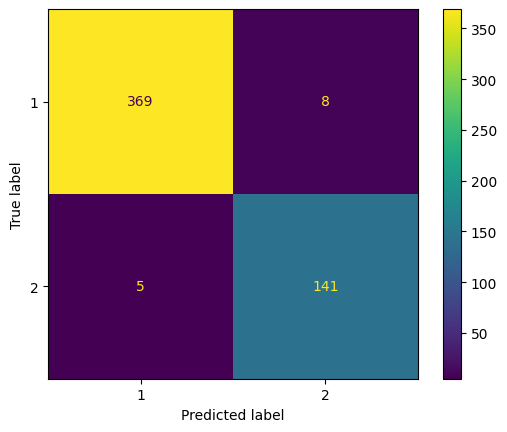

In [106]:
cm = confusion_matrix(y_test_merged_amusement, y_pred_merged_amusement, labels=clf_forest_merged_amusement.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_forest_merged_amusement.best_estimator_.classes_)
disp.plot()
plt.show()

### Dropped Amusement

In [107]:
y_pred_no_amusement = clf_forest_no_amusement.predict(X_test_no_amusement)

In [108]:
accuracy_score(y_test_no_amusement, y_pred_no_amusement)

0.9704545454545455

In [109]:
balanced_accuracy_score(y_test_no_amusement, y_pred_no_amusement)

0.9654234654234655

In [110]:
f1_score(y_test_no_amusement, y_pred_no_amusement)

0.9781512605042016

In [111]:
precision_score(y_test_no_amusement, y_pred_no_amusement)

0.9765100671140939

In [112]:
recall_score(y_test_no_amusement, y_pred_no_amusement)

0.9797979797979798

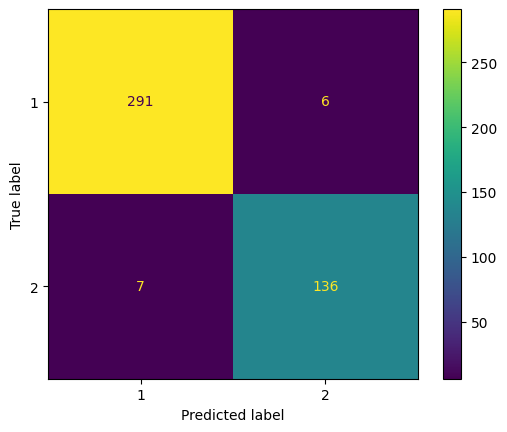

In [113]:
cm = confusion_matrix(y_test_no_amusement, y_pred_no_amusement, labels=clf_forest_no_amusement.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_forest_no_amusement.best_estimator_.classes_)
disp.plot()
plt.show()

## XAI

### Merged Baseline

#### Morris Sensitivity Analysis

In [114]:
msa = MorrisSensitivity(predict_fn=clf_forest_merged_amusement.best_estimator_.predict, data=X_train_merged_amusement, feature_names=features[:-1])
msa_global = msa.explain_global()
show(msa_global)

#### Shapley Additive Explanations

In [115]:
shap = ShapKernel(predict_fn=clf_forest_merged_amusement.best_estimator_.predict, data=X_train_merged_amusement, feature_names=features[:-1])
shap_local = shap.explain_local(X_test_merged_amusement[:5], y_test_merged_amusement[:5])
show(shap_local)

Using 1568 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/5 [00:00<?, ?it/s]

#### Local Interpretable Model-agnostic Explanations

In [116]:
lime = LimeTabular(predict_fn=clf_forest_merged_amusement.best_estimator_.predict, data=X_train_merged_amusement, feature_names=features[:-1])
lime_local = lime.explain_local(X_test_merged_amusement[:5], y_test_merged_amusement[:5])
show(lime_local)

#### Partial Dependence Plot

In [117]:
pdp = PartialDependence(predict_fn=clf_forest_merged_amusement.best_estimator_.predict, data=X_train_merged_amusement, feature_names=features[:-1])
pdp_global = pdp.explain_global()
show(pdp_global)

### Dropped Baseline

#### Morris Sensitivity Analysis

In [118]:
msa = MorrisSensitivity(predict_fn=clf_forest_no_amusement.best_estimator_.predict, data=X_train_no_amusement, feature_names=features[:-1])
msa_global = msa.explain_global()
show(msa_global)

#### Shapley Additive Explanations

In [119]:
shap = ShapKernel(predict_fn=clf_forest_no_amusement.best_estimator_.predict, data=X_train_no_amusement, feature_names=features[:-1])
shap_local = shap.explain_local(X_test_merged_amusement[:5], y_test_merged_amusement[:5])
show(shap_local)

Using 1320 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/5 [00:00<?, ?it/s]

#### Local Interpretable Model-agnostic Explanations

In [120]:
lime = LimeTabular(predict_fn=clf_forest_no_amusement.best_estimator_.predict, data=X_train_no_amusement, feature_names=features[:-1])
lime_local = lime.explain_local(X_test_merged_amusement[:5], y_test_merged_amusement[:5])
show(lime_local)

#### Partial Dependence Plot

In [121]:
pdp = PartialDependence(predict_fn=clf_forest_no_amusement.best_estimator_.predict, data=X_train_no_amusement, feature_names=features[:-1])
pdp_global = pdp.explain_global()
show(pdp_global)